In [1]:
### Opdracht 1
#importeer de twee datasets

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data_pad_water = "/Users/hbraakmann/Downloads/datasets/jaar_vlis_1862.asc"

df_vlis = pd.read_csv(data_pad_water, sep=";", comment="#", header=None, names=["jaar",
                                                                       "jaargemiddeld hoogwater (cm)",
                                                                       "jaargemiddeld laagwater (cm)",
                                                                       "jaargemiddeld tijverschil (cm)",
                                                                       "jaargemiddelde waterstand (cm)",
                                                                      ])

df_vlis
data1 = df_vlis[["jaar", "jaargemiddelde waterstand (cm)"]].iloc[38:]
data1

,jaar,jaargemiddelde waterstand (cm)
38,1900,-24.0
39,1901,-27.9
40,1902,-29.4
41,1903,-14.9
42,1904,-16.1
...,...,...
143,2005,2.4
144,2006,0.0
145,2007,4.5
146,2008,1.9


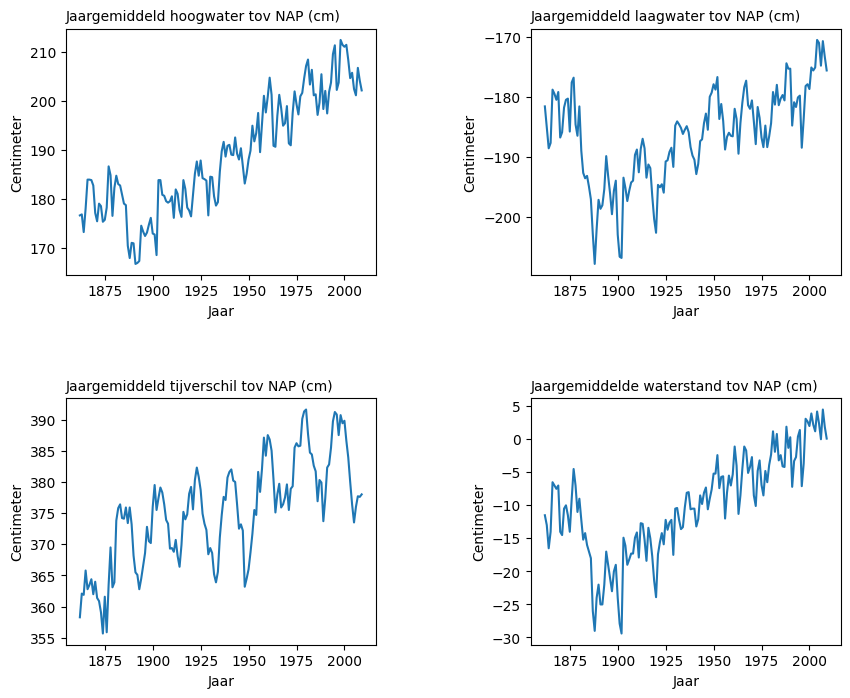

In [2]:
#plot de dataset df_vlis

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))

ax1.plot(df_vlis["jaar"], df_vlis["jaargemiddeld hoogwater (cm)"])
ax1.set_title("Jaargemiddeld hoogwater tov NAP (cm)", fontsize=10, loc="left")
ax1.set_xlabel("Jaar")
ax1.set_ylabel("Centimeter")

ax2.plot(df_vlis["jaar"], df_vlis["jaargemiddeld laagwater (cm)"])
ax2.set_title("Jaargemiddeld laagwater tov NAP (cm)", fontsize=10, loc="left")
ax2.set_xlabel("Jaar")
ax2.set_ylabel("Centimeter")

ax3.plot(df_vlis["jaar"], df_vlis["jaargemiddeld tijverschil (cm)"])
ax3.set_title("Jaargemiddeld tijverschil tov NAP (cm)", fontsize=10, loc="left")
ax3.set_xlabel("Jaar")
ax3.set_ylabel("Centimeter")


ax4.plot(df_vlis["jaar"], df_vlis["jaargemiddelde waterstand (cm)"])
ax4.set_title("Jaargemiddelde waterstand tov NAP (cm)", fontsize=10, loc="left")
ax4.set_xlabel("Jaar")
ax4.set_ylabel("Centimeter")


plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()

In [23]:
### Opdracht 2
#importeer de tweede dataset

data_vlis = "/Users/hbraakmann/Downloads/datasets/waterstanden_rpbu_vlis/waterstanden_vlis.csv"
df_waterstanden_vlis = pd.read_csv(data_vlis, header=0, names=["Datum", "wt_VLIS"])
df_waterstanden_vlis["Datum"] = pd.to_datetime(df_waterstanden_vlis["Datum"])
vlis_grouped = df_waterstanden_vlis.groupby(df_waterstanden_vlis["Datum"].dt.year)["wt_VLIS"].mean().reset_index()
vlis_grouped.columns = ["jaar", "jaargemiddelde waterstand (cm)"]
vlis_grouped["jaar"] = vlis_grouped["jaar"].astype("int64")

data2 = vlis_grouped


In [137]:
#voeg de twee datasets [data1, data2] samen

final = pd.concat([data1, data2])
#final

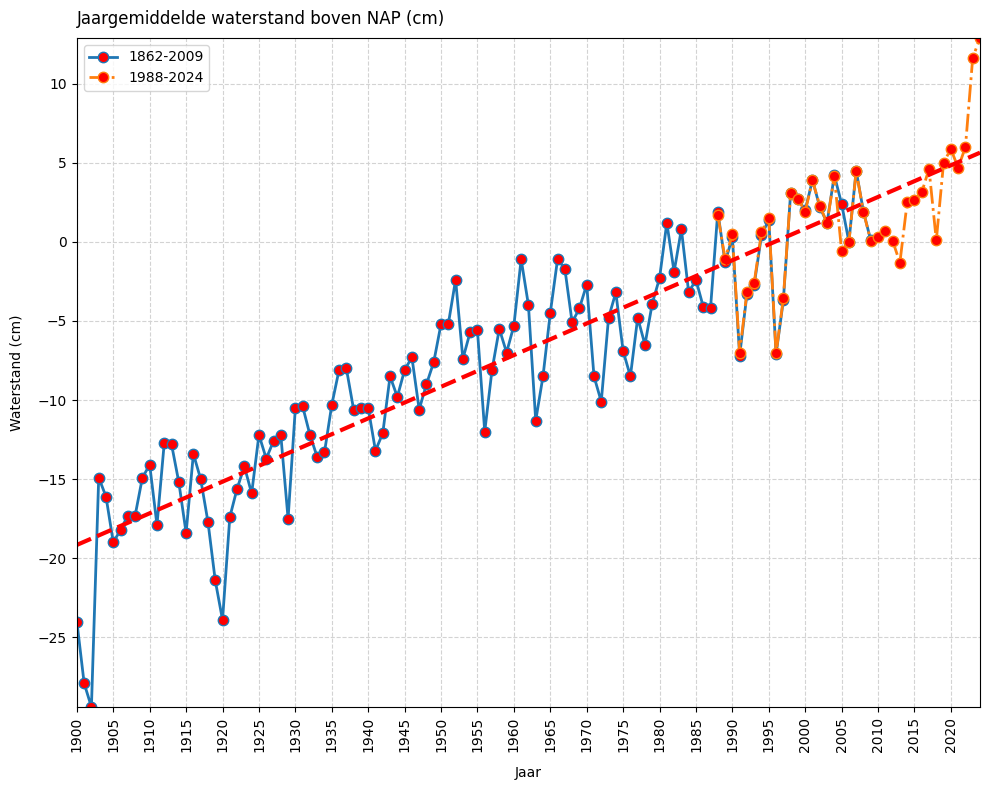

In [186]:
### plot deze nieuwe dataset 

fig, ax = plt.subplots(figsize=(10, 8))

m = np.polyfit(final["jaar"], final["jaargemiddelde waterstand (cm)"], 1)
trend = np.poly1d(m)

ax.plot(data1["jaar"], data1["jaargemiddelde waterstand (cm)"], linewidth=2, marker=".", markersize=15, mfc="red", label="1862-2009")
ax.plot(data2["jaar"], data2["jaargemiddelde waterstand (cm)"], linewidth=2, linestyle="dashdot", marker=".", markersize=15, mfc="red", label="1988-2024")
ax.plot(final["jaar"], trend(final["jaar"]), color="red", linestyle="dashed", linewidth=3)

ax.set_xlabel("Jaar", labelpad=10)
ax.set_xticks(np.arange(1900, 2024, 5))
ax.tick_params(axis="x", rotation=90)
ax.set_xlim(final["jaar"].min(), final["jaar"].max())

ax.set_ylabel("Waterstand (cm)", labelpad=10)
ax.set_yticks(np.arange(-30, 15, step=5))
ax.set_ylim(final["jaargemiddelde waterstand (cm)"].min(), final["jaargemiddelde waterstand (cm)"].max())

ax.grid(axis="both", color="lightgray", linestyle="dashed")
ax.set_title("Jaargemiddelde waterstand boven NAP (cm)", loc="left", pad=10)
ax.legend()

plt.tight_layout()
plt.show()